In [234]:
import quantrocket.master
import pandas as pd, numpy as np
import math
from quantrocket import get_prices
from quantrocket.zipline import ingest_bundle

from collections import defaultdict

In [272]:
%run "utils/ema.py"
%run "utils/ama.py"

In [ ]:
ingest_bundle("usstock-1d")

{'status': 'the data will be ingested asynchronously'}

In [236]:
prices = get_prices("usstock-1d", universes="usstock", start_date="2017-01-01", fields=["Close"])

In [237]:
prices = prices.dropna(axis=1, thresh=100)
prices = prices.dropna(axis=1, thresh=1000)

In [238]:
prices.head()

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03          44.367          28.556           1.952   
      2017-01-04          44.950          29.972           1.977   
      2017-01-05          44.415          30.358           1.933   
      2017-01-06          45.799          30.388           1.881   
      2017-01-09          45.942          29.200           1.828   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03           9.160             NaN          44.741   
      2017-01-04           9.263             NaN          45.128   
      2017-01-05           9.135             NaN          44.345   
      2017-01-06           9.050             NaN          44.654   
      2017-01-09           9.111             NaN          45.495   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03           53.00           3.979          26.691   
      2017-01-04           55.95           3.979          27.251   
      2017-01-05           58.00           3.737          26.197   
      2017-01-06           59.00           3.979          25.820   
      2017-01-09           59.90           3.834          26.147   

Sid               FIBBG000D6VW15  ...  FIBBG00DY7QWH1  FIBBG000BXB8X8  \
Field Date                        ...                                   
Close 2017-01-03           23.10  ...          11.527           5.317   
      2017-01-04           23.51  ...          11.603           5.348   
      2017-01-05           22.81  ...          12.265           5.359   
      2017-01-06           22.42  ...          12.614           5.350   
      2017-01-09           22.24  ...          12.293           5.335   

Sid               FIBBG0039320N9  FIBBG000PYX812  FIBBG000BT3HG5  \
Field Date                                                         
Close 2017-01-03          51.471           22.00             NaN   
      2017-01-04          51.970           22.75             NaN   
      2017-01-05          51.797           20.60             NaN   
      2017-01-06          51.961           19.85             NaN   
      2017-01-09          51.817           19.95             NaN   

Sid               FIBBG000C3CQP1  FIBBG00GD15LJ5  FIBBG007BBS8B7  \
Field Date                                                         
Close 2017-01-03           10.28             NaN           17.95   
      2017-01-04           10.42             NaN           18.85   
      2017-01-05           10.26             NaN           19.20   
      2017-01-06           10.36             NaN           18.32   
      2017-01-09           10.41             NaN           18.08   

Sid               FIBBG000BJBXZ2  FIBBG011MC2100  
Field Date                                        
Close 2017-01-03             NaN           3.198  
      2017-01-04             NaN           3.155  
      2017-01-05             NaN           3.198  
      2017-01-06             NaN           3.177  
      2017-01-09             NaN           3.155  

[5 rows x 5147 columns]

In [239]:
prices

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03          44.367          28.556           1.952   
      2017-01-04          44.950          29.972           1.977   
      2017-01-05          44.415          30.358           1.933   
      2017-01-06          45.799          30.388           1.881   
      2017-01-09          45.942          29.200           1.828   
...                          ...             ...             ...   
      2023-02-17         148.260          46.890           2.150   
      2023-02-21             NaN             NaN             NaN   
      2023-02-22             NaN             NaN             NaN   
      2023-02-23             NaN             NaN             NaN   
      2023-02-24             NaN             NaN             NaN   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03           9.160             NaN          44.741   
      2017-01-04           9.263             NaN          45.128   
      2017-01-05           9.135             NaN          44.345   
      2017-01-06           9.050             NaN          44.654   
      2017-01-09           9.111             NaN          45.495   
...                          ...             ...             ...   
      2023-02-17           3.010           19.55          16.360   
      2023-02-21             NaN             NaN             NaN   
      2023-02-22             NaN             NaN             NaN   
      2023-02-23             NaN             NaN             NaN   
      2023-02-24             NaN             NaN             NaN   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03           53.00           3.979          26.691   
      2017-01-04           55.95           3.979          27.251   
      2017-01-05           58.00           3.737          26.197   
      2017-01-06           59.00           3.979          25.820   
      2017-01-09           59.90           3.834          26.147   
...                          ...             ...             ...   
      2023-02-17           40.61           2.470          23.420   
      2023-02-21             NaN             NaN             NaN   
      2023-02-22             NaN             NaN             NaN   
      2023-02-23             NaN             NaN             NaN   
      2023-02-24             NaN             NaN             NaN   

Sid               FIBBG000D6VW15  ...  FIBBG00DY7QWH1  FIBBG000BXB8X8  \
Field Date                        ...                                   
Close 2017-01-03           23.10  ...          11.527           5.317   
      2017-01-04           23.51  ...          11.603           5.348   
      2017-01-05           22.81  ...          12.265           5.359   
      2017-01-06           22.42  ...          12.614           5.350   
      2017-01-09           22.24  ...          12.293           5.335   
...                          ...  ...             ...             ...   
      2023-02-17            2.80  ...          25.010           6.770   
      2023-02-21             NaN  ...             NaN             NaN   
      2023-02-22             NaN  ...             NaN             NaN   
      2023-02-23             NaN  ...             NaN             NaN   
      2023-02-24             NaN  ...             NaN             NaN   

Sid               FIBBG0039320N9  FIBBG000PYX812  FIBBG000BT3HG5  \
Field Date                                                         
Close 2017-01-03          51.471           22.00             NaN   
      2017-01-04          51.970           22.75             NaN   
      2017-01-05          51.797           20.60             NaN   
      2017-01-06          51.961           19.85       

In [240]:
prices.ewm(alpha=0.9).mean().head()

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3  FIBBG000V2S3P6  \
Field Date                                                         
Close 2017-01-03       44.367000       28.556000        1.952000   
      2017-01-04       44.897000       29.843273        1.974727   
      2017-01-05       44.462766       30.306991        1.937135   
      2017-01-06       45.665497       30.379906        1.886608   
      2017-01-09       45.914352       29.317980        1.833860   

Sid               FIBBG000BD1373  FIBBG00GNHC1T4  FIBBG005P7Q881  \
Field Date                                                         
Close 2017-01-03        9.160000             NaN       44.741000   
      2017-01-04        9.253636             NaN       45.092818   
      2017-01-05        9.146757             NaN       44.419108   
      2017-01-06        9.059667             NaN       44.630532   
      2017-01-09        9.105867             NaN       45.408561   

Sid               FIBBG003PNL136  FIBBG000B9XB24  FIBBG000D9V7T4  \
Field Date                                                         
Close 2017-01-03       53.000000        3.979000       26.691000   
      2017-01-04       55.681818        3.979000       27.200091   
      2017-01-05       57.770270        3.760982       26.296405   
      2017-01-06       58.877138        3.957218       25.867598   
      2017-01-09       59.797723        3.846321       26.119062   

Sid               FIBBG000D6VW15  ...  FIBBG00DY7QWH1  FIBBG000BXB8X8  \
Field Date                        ...                                   
Close 2017-01-03       23.100000  ...       11.527000        5.317000   
      2017-01-04       23.472727  ...       11.596091        5.345182   
      2017-01-05       22.875676  ...       12.198712        5.357631   
      2017-01-06       22.465527  ...       12.572509        5.350762   
      2017-01-09       22.262551  ...       12.320948        5.336576   

Sid               FIBBG0039320N9  FIBBG000PYX812  FIBBG000BT3HG5  \
Field Date                                                         
Close 2017-01-03       51.471000       22.000000             NaN   
      2017-01-04       51.924636       22.681818             NaN   
      2017-01-05       51.809649       20.806306             NaN   
      2017-01-06       51.945878       19.945545             NaN   
      2017-01-09       51.829887       19.949554             NaN   

Sid               FIBBG000C3CQP1  FIBBG00GD15LJ5  FIBBG007BBS8B7  \
Field Date                                                         
Close 2017-01-03       10.280000             NaN       17.950000   
      2017-01-04       10.407273             NaN       18.768182   
      2017-01-05       10.274595             NaN       19.157207   
      2017-01-06       10.351467             NaN       18.403645   
      2017-01-09       10.404147             NaN       18.112362   

Sid               FIBBG000BJBXZ2  FIBBG011MC2100  
Field Date                                        
Close 2017-01-03             NaN        3.198000  
      2017-01-04             NaN        3.158909  
      2017-01-05             NaN        3.194126  
      2017-01-06             NaN        3.178711  
      2017-01-09             NaN        3.157371  

[5 rows x 5147 columns]

In [241]:
df = prices[['FIBBG000C2V3D6', 'FIBBG00B3T3HD3']].head(4)

In [242]:
df

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3
Field Date                                      
Close 2017-01-03          44.367          28.556
      2017-01-04          44.950          29.972
      2017-01-05          44.415          30.358
      2017-01-06          45.799          30.388

In [243]:
# hyper params
alpha_min, alpha_max = 0.6, 0.9
beta = 0.1
gamma = 0.5

In [244]:
df

Sid               FIBBG000C2V3D6  FIBBG00B3T3HD3
Field Date                                      
Close 2017-01-03          44.367          28.556
      2017-01-04          44.950          29.972
      2017-01-05          44.415          30.358
      2017-01-06          45.799          30.388

In [245]:
sid = 'FIBBG000C2V3D6'

In [273]:
prices_ema, _, _ = get_df_ema(prices[[sid]], alpha=0.3, beta=0.5)

In [275]:
prices_ama, _, _ = get_df_ama(prices[[sid]], alpha_min=0.3, alpha_max=0.7, beta=0.5, gamma=0.5)

<AxesSubplot:xlabel='Field,Date'>

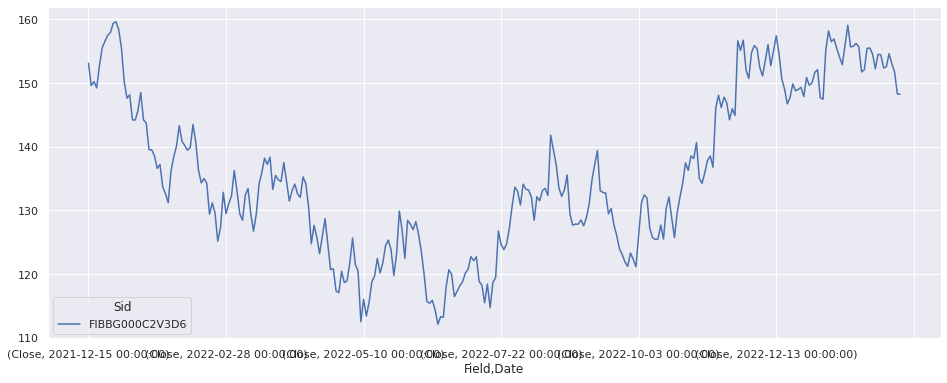

In [277]:
prices[[sid]].iloc[-300:].plot()

<AxesSubplot:xlabel='Field,Date'>

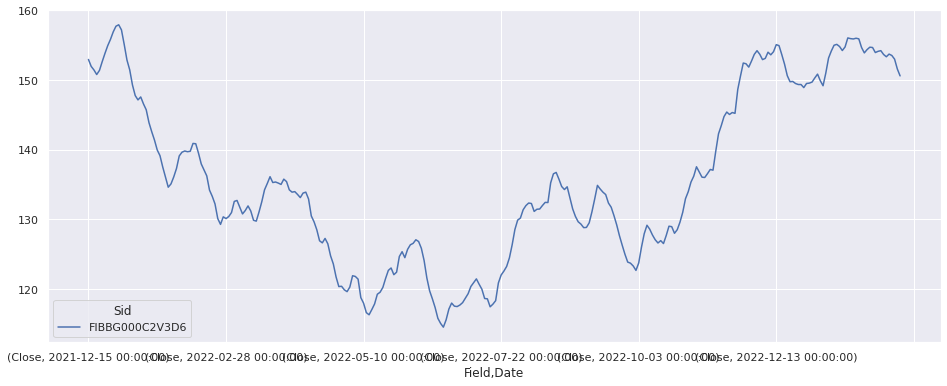

In [278]:
prices_ema[[sid]].iloc[-300:].plot()

<AxesSubplot:xlabel='Field,Date'>

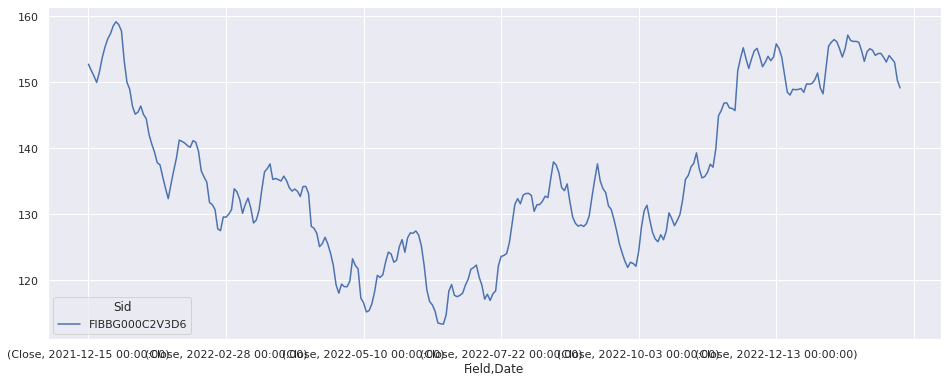

In [279]:
prices_ama[[sid]].iloc[-300:].plot()